In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/calculadora-aluguel-ml/main/2%20-%20manipula%C3%A7%C3%A3o-de-dados/dados_aluguel_manipulados.csv'

In [21]:
df = pd.read_csv(url, encoding='utf-8')

In [22]:
df.head()

,logradouro,nome_logradouro,bairro,zona,area,quartos,aluguel
0,rua,José Timotheo Da Silva,Jardim Peri,norte,51,2,950
1,rua,Plinio Colás,Lauzane Paulista,norte,126,3,2500
2,rua,Doutor Gabriel Covelli,Parque Peruche,norte,55,1,900
3,rua,Dos Camarés 150,Carandiru,norte,58,2,1490
4,rua,Francisco Da Lira,Jardim Leonor Mendes De Barros,norte,96,2,1211


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   logradouro       1630 non-null   object
 1   nome_logradouro  1630 non-null   object
 2   bairro           1630 non-null   object
 3   zona             1630 non-null   object
 4   area             1630 non-null   int64 
 5   quartos          1630 non-null   int64 
 6   aluguel          1630 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 89.3+ KB


 - Verificando a existência de valores nulos.

In [6]:
df.isna().sum()

logradouro         0
nome_logradouro    0
bairro             0
zona               0
area               0
quartos            0
aluguel            0
dtype: int64

In [7]:
df.shape

(1630, 7)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1630.0,146.435583,2774.295109,10.0,44.0,60.0,87.0,112055.0
quartos,1630.0,1.925153,0.858593,1.0,1.0,2.0,2.0,6.0
aluguel,1630.0,2612.619632,1945.032670,500.0,1500.0,2100.0,3000.0,15000.0


<AxesSubplot:>

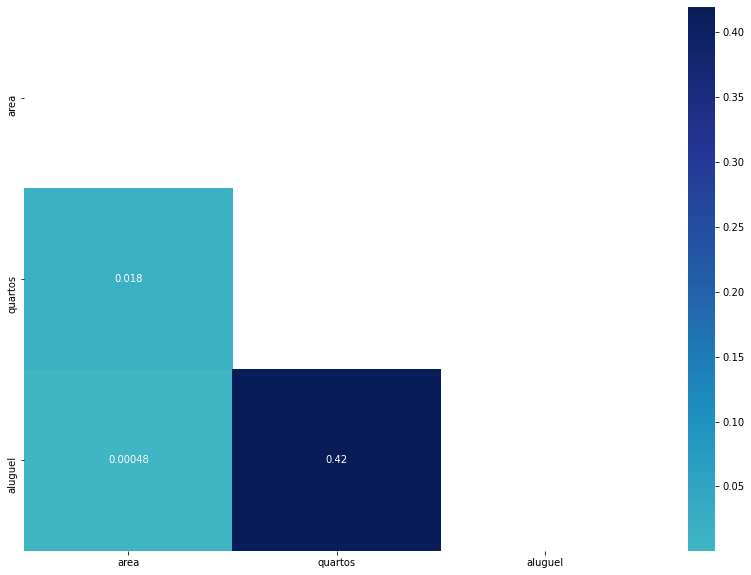

In [9]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))


sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

- Gerando algumas visualizações.

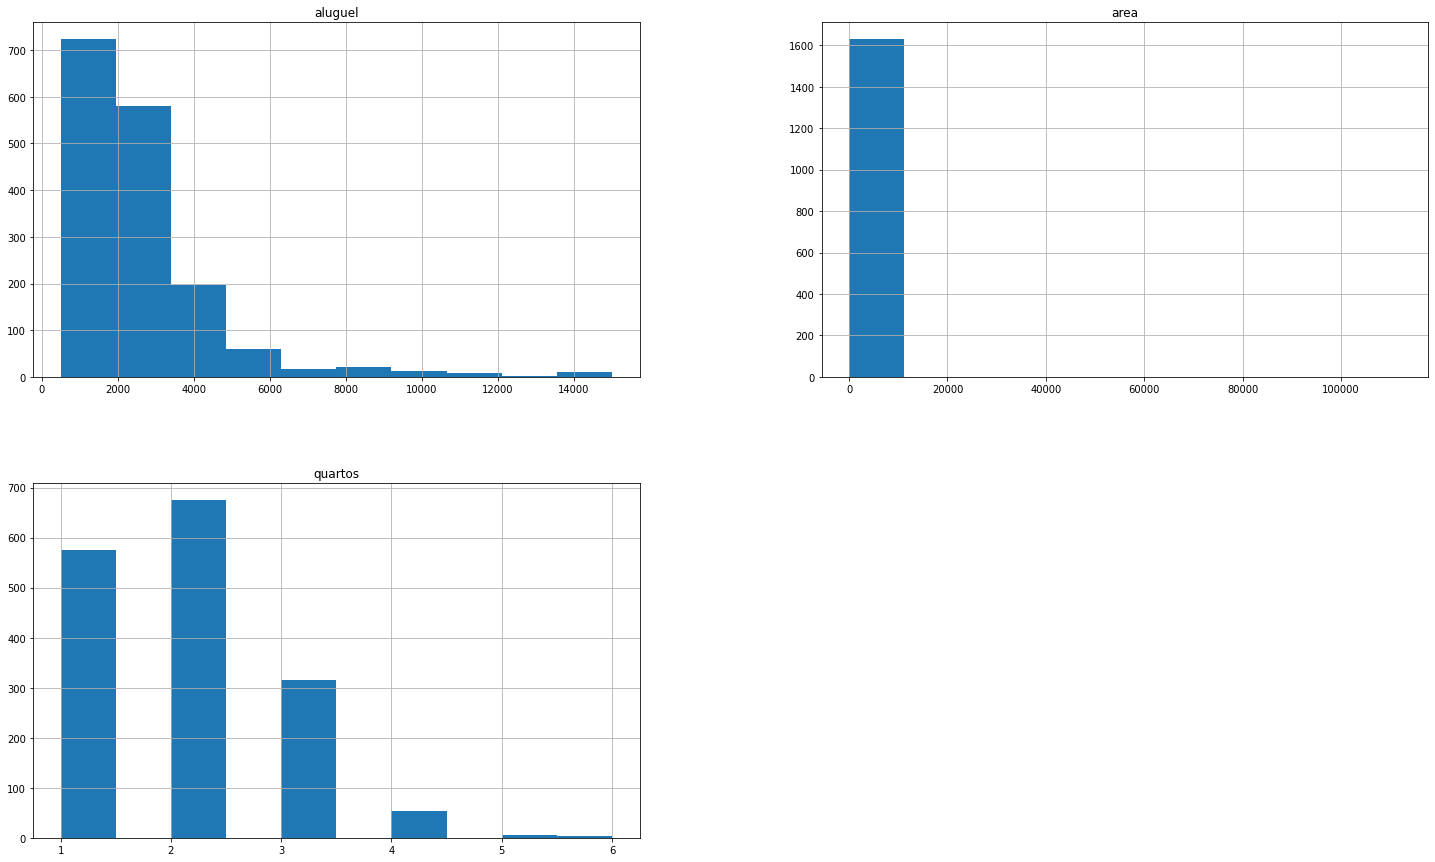

In [11]:
df.hist(figsize=(25,15))
plt.show()

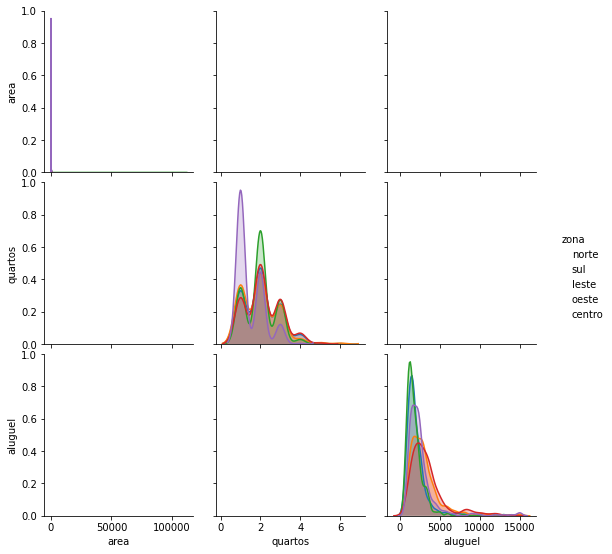

In [12]:
sns.pairplot(data = df, hue = 'zona', kind='hist')

<AxesSubplot:xlabel='area', ylabel='aluguel'>

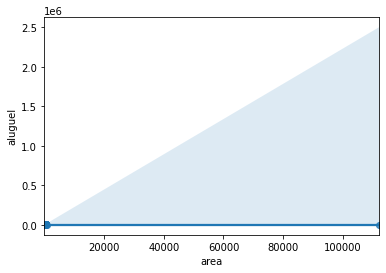

In [13]:
sns.regplot('area','aluguel', data=df)

<AxesSubplot:xlabel='zona', ylabel='aluguel'>

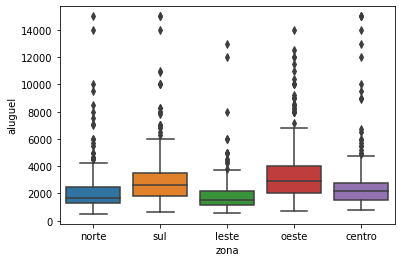

In [14]:
sns.boxplot(x='zona', y='aluguel', data=df)

<AxesSubplot:xlabel='aluguel'>

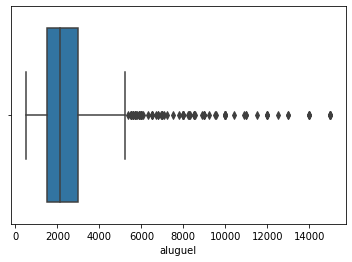

In [15]:
sns.boxplot(df['aluguel'])

<AxesSubplot:xlabel='area'>

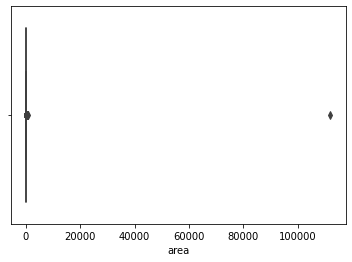

In [16]:
sns.boxplot(df['area'])

 - Tratando outliers

In [24]:
df.shape

(1630, 7)

In [31]:
df = df.query('area <= 1000 ')

<AxesSubplot:xlabel='area'>

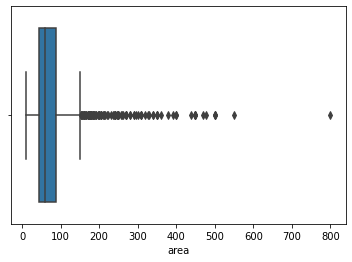

In [32]:
sns.boxplot(df['area'])

In [33]:
df = df.query('area <= 300 ')

<AxesSubplot:xlabel='area'>

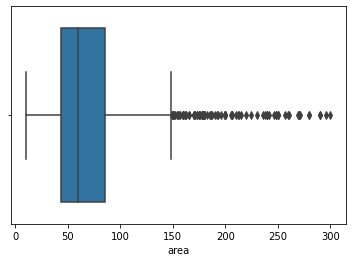

In [34]:
sns.boxplot(df['area'])

<AxesSubplot:xlabel='aluguel'>

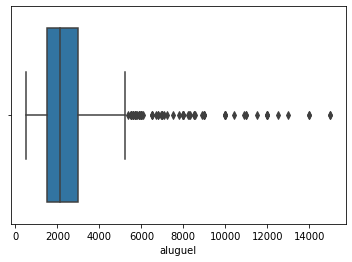

In [35]:
sns.boxplot(df['aluguel'])

array([[<AxesSubplot:title={'center':'aluguel'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'quartos'}>, <AxesSubplot:>]],
      dtype=object)

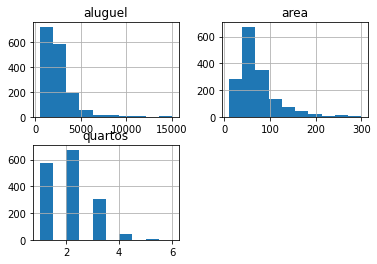

In [36]:
df.hist()

In [52]:
pd.set_option('display.max_rows', 250)
df.bairro.value_counts().head(150)

 Bela Vista                             75
 Pinheiros                              55
 Consolação                             51
 Santana                                46
 Perdizes                               33
 Vila Buarque                           29
 Vila Mariana                           29
 Santa Cecília                          28
 Moóca                                  26
 Jardim Paulista                        24
 Penha De Franca                        22
 Cerqueira César                        20
 Campos Elíseos                         19
 Vila Regente Feijó                     19
 Barra Funda                            19
 Liberdade                              17
 Cidade Moncoes                         16
 Vila Andrade                           15
 Vila Olímpia                           15
 Centro                                 14
 Água Branca                            14
 Jardim Peri                            14
 Santa Teresinha                        13
 Ipiranga  

 - Selecionando apenas os bairros com no mínimo 3 registros.

In [57]:
dic_select = dict(df.bairro.value_counts().head(150))

In [58]:
lista_select = list(dic_select.keys())

In [60]:
df = df.set_index('bairro')

In [61]:
df = df.loc[lista_select]

In [62]:
df = df.reset_index()

 - Salvando em arquivo csv.

In [63]:
df.to_csv('dados_filtrados.csv', encoding='utf-8')